[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


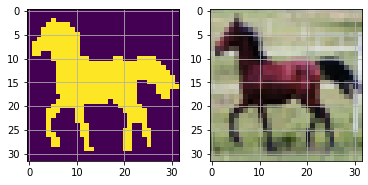

In [96]:
"""
code snippet adapted        from https://gist.github.com/gyglim/714cb24a1c34c95e0a0c9a8a4ec0620c
weizmann_32_32_trainval.mat from https://www.cs.toronto.edu/~yujiali/papers/chopps.zip
horse.mat                   from https://www.cs.toronto.edu/~yujiali/papers/cvpr13_data.zip
"""
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import json

split_path = 'weizmann_32_32_trainval.mat'
data_path = 'horse.mat'

split_info = scipy.io.loadmat(split_path)
image_data = scipy.io.loadmat(data_path)

def get_data_for_split(data, split_info, split_name):
  """Get the images and masks for a given split."""
  splits = {"train": [0, 160], "val": [160, 200], "test": [200, 328]}
  split = splits[split_name]
  # Substract 1, as the idx uses 1-based indexing.
  indices= split_info['idx'][0][split[0]:split[1]] - 1
  images = [i[0] for i in data['imgs'][indices]]
  masks = [m.reshape(32,32).T for m in data['segs'][indices]]
  
  return images, masks

for split in ["train", "val", "test"]:
    images, masks = get_data_for_split(image_data, split_info, split)
    np.save(
        f"weizmann_horse_{split}.npy", 
        [{"split": split, "images": images, "masks": masks}]
    )

# Show the first image
plt.subplot(1,2,1)
plt.imshow(masks[-1])
plt.grid('off')
plt.subplot(1,2,2)
plt.imshow(images[-1])
plt.grid('off')

print(masks[-1])

In [1]:
"""
code snippet adapted        from https://gist.github.com/gyglim/714cb24a1c34c95e0a0c9a8a4ec0620c
weizmann_32_32_trainval.mat from https://www.cs.toronto.edu/~yujiali/papers/chopps.zip
horse.mat                   from https://www.cs.toronto.edu/~yujiali/papers/cvpr13_data.zip
"""
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import json

split_path = 'weizmann_32_32_trainval.mat'
data_path = 'horse.mat'

split_info = scipy.io.loadmat(split_path)
image_data = scipy.io.loadmat(data_path)

def get_data_for_split(data, split_info, split_name):
  """Get the images and masks for a given split."""
  splits = {"trainval": [0, 200]}
  split = splits[split_name]
  # Substract 1, as the idx uses 1-based indexing.
  indices= split_info['idx'][0][split[0]:split[1]] - 1
  images = [i[0] for i in data['imgs'][indices]]
  masks = [m.reshape(32,32).T for m in data['segs'][indices]]
  
  return images, masks

for split in ["trainval"]:
    images, masks = get_data_for_split(image_data, split_info, split)
    np.save(
        f"weizmann_horse_{split}.npy", 
        [{"split": split, "images": images, "masks": masks}]
    )

In [28]:
data = np.load(f"weizmann_horse_test.npy", allow_pickle=True)
data[0]['images'][0].shape

(32, 32, 3)

In [29]:
images

[array([[[126, 135, 152],
         [157, 178, 194],
         [155, 173, 193],
         ...,
         [ 63,  86,  67],
         [ 75,  94,  77],
         [ 54,  72,  60]],
 
        [[155, 173, 193],
         [184, 218, 237],
         [181, 210, 232],
         ...,
         [ 74, 105,  85],
         [ 61,  88,  75],
         [ 54,  71,  67]],
 
        [[119, 148, 149],
         [103, 146, 144],
         [112, 149, 149],
         ...,
         [ 62,  96,  78],
         [ 32,  60,  53],
         [ 30,  47,  44]],
 
        ...,
 
        [[174, 164, 157],
         [225, 215, 204],
         [220, 210, 197],
         ...,
         [200, 190, 182],
         [205, 196, 187],
         [162, 157, 150]],
 
        [[194, 190, 184],
         [255, 250, 243],
         [251, 246, 238],
         ...,
         [200, 199, 201],
         [207, 206, 208],
         [163, 162, 161]],
 
        [[159, 158, 155],
         [206, 205, 203],
         [202, 201, 199],
         ...,
         [199, 199, 199],
  